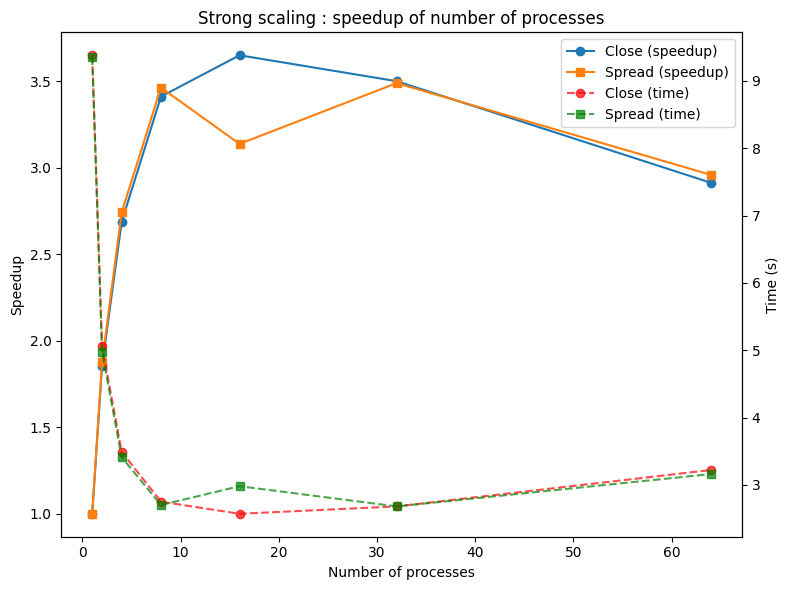

In [14]:
import matplotlib.pyplot as plt

# Données "close"
ranks_close = [1, 2, 4, 8, 16, 32, 64]
time_close = [9.380, 5.060, 3.490, 2.750, 2.570, 2.680, 3.220]

# Données "spread"
ranks_spread = [1, 2, 4, 8, 16, 32, 64]
time_spread = [9.350, 4.980, 3.410, 2.700, 2.980, 2.680, 3.160]

# Temps séquentiel (1 thread)
t1_close = time_close[0]
t1_spread = time_spread[0]

# Calcul du speedup
speedup_close = [t1_close / t for t in time_close]
speedup_spread = [t1_spread / t for t in time_spread]

# Ligne idéale (scaling parfait)
ideal = ranks_close  # car speedup = p si parfait

# Tracé
fig, ax1 = plt.subplots(figsize=(8,6))

# Speedup (axe de gauche)
ax1.plot(ranks_close, speedup_close, 'o-', label="Close (speedup)")
ax1.plot(ranks_spread, speedup_spread, 's-', label="Spread (speedup)")
ax1.set_xlabel("Number of processes")
ax1.set_ylabel("Speedup")

# Temps (axe de droite)
ax2 = ax1.twinx()
ax2.plot(ranks_close, time_close, 'o--', color='red', alpha=0.7, label="Close (time)")
ax2.plot(ranks_spread, time_spread, 's--', color='green', alpha=0.7, label="Spread (time)")
ax2.set_ylabel("Time (s)")

# Légendes combinées
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="best")

plt.title("Strong scaling : speedup of number of processes")
plt.tight_layout()
plt.show()


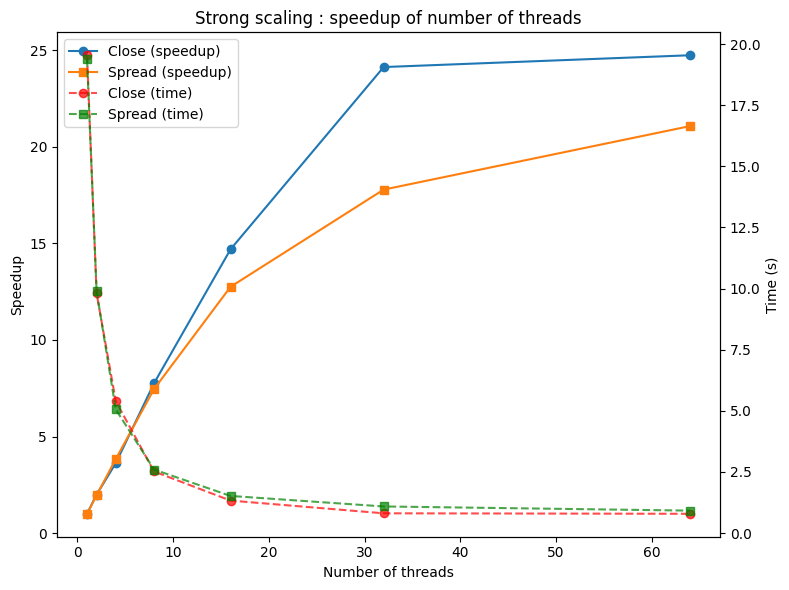

In [13]:
import matplotlib.pyplot as plt

# Données "close"
ranks_close = [1, 2, 4, 8, 16, 32, 64]
time_close = [19.540, 9.800, 5.400, 2.520, 1.330, 0.810, 0.790]

# Données "spread"
ranks_spread = [1, 2, 4, 8, 16, 32, 64]
time_spread = [19.380, 9.880, 5.060, 2.600, 1.520, 1.090, 0.920]

# Temps séquentiel (1 thread)
t1_close = time_close[0]
t1_spread = time_spread[0]

# Calcul du speedup
speedup_close = [t1_close / t for t in time_close]
speedup_spread = [t1_spread / t for t in time_spread]

# Ligne idéale (scaling parfait)
ideal = ranks_close  # car speedup = p si parfait

# Tracé
fig, ax1 = plt.subplots(figsize=(8,6))

# Speedup (axe de gauche)
ax1.plot(ranks_close, speedup_close, 'o-', label="Close (speedup)")
ax1.plot(ranks_spread, speedup_spread, 's-', label="Spread (speedup)")
ax1.set_xlabel("Number of threads")
ax1.set_ylabel("Speedup")

# Temps (axe de droite)
ax2 = ax1.twinx()
ax2.plot(ranks_close, time_close, 'o--', color='red', alpha=0.7, label="Close (time)")
ax2.plot(ranks_spread, time_spread, 's--', color='green', alpha=0.7, label="Spread (time)")
ax2.set_ylabel("Time (s)")

# Légendes combinées
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="best")

plt.title("Strong scaling : speedup of number of threads")
plt.tight_layout()
plt.show()

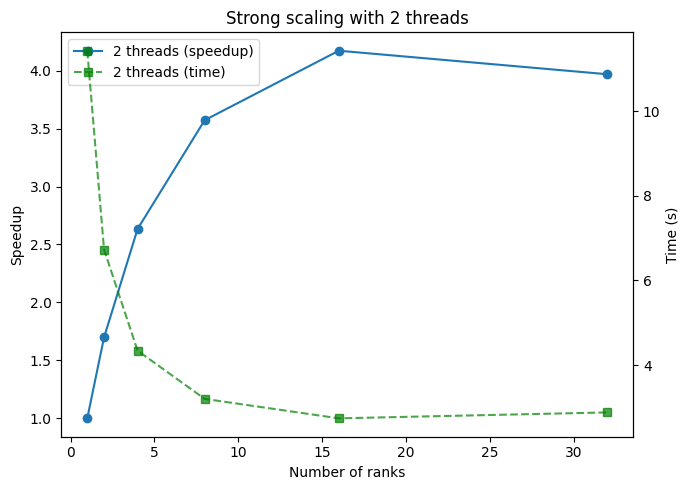

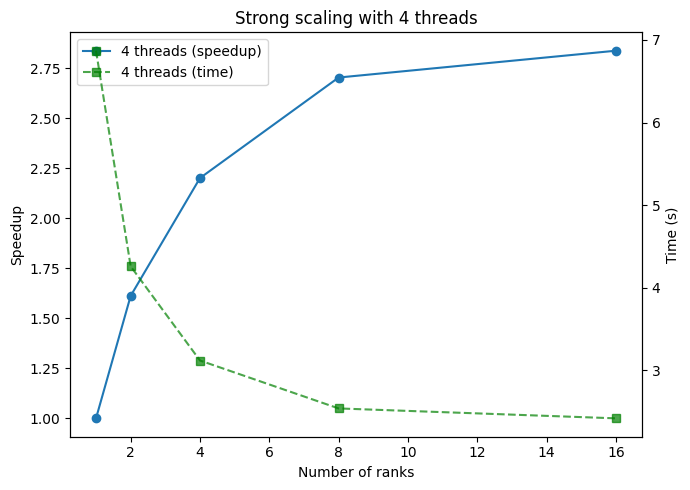

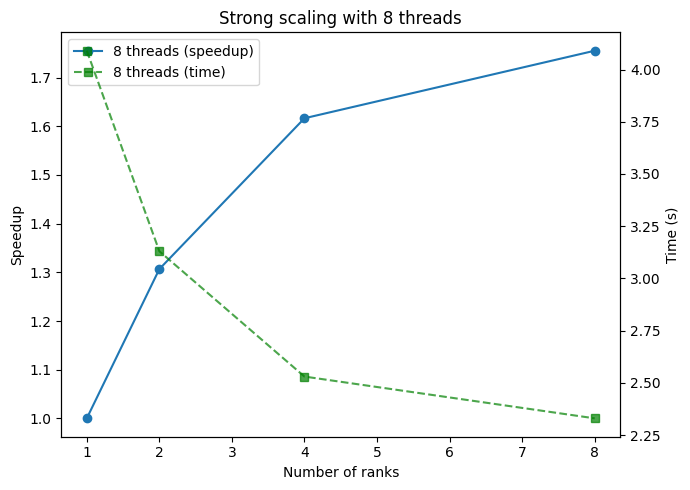

In [12]:
import matplotlib.pyplot as plt

# Données : strong scaling avec 2 threads
ranks_2t = [1, 2, 4, 8, 16, 32]
time_2t = [11.430, 6.730, 4.340, 3.200, 2.740, 2.880]

# Données : strong scaling avec 4 threads
ranks_4t = [1, 2, 4, 8, 16]
time_4t = [6.870, 4.260, 3.120, 2.540, 2.420]

# Données : strong scaling avec 8 threads
ranks_8t = [1, 2, 4, 8]
time_8t = [4.090, 3.130, 2.530, 2.330]

# Fonction utilitaire pour tracer chaque graphe
def plot_scaling(ranks, times, n_threads):
    t1 = times[0]
    speedup = [t1 / t for t in times]
    ideal = ranks

    fig, ax1 = plt.subplots(figsize=(7,5))

    # Speedup (axe gauche)
    ax1.plot(ranks, speedup, 'o-', label=f"{n_threads} threads (speedup)")
    ax1.set_xlabel("Number of ranks")
    ax1.set_ylabel("Speedup")

    # Temps (axe droit)
    ax2 = ax1.twinx()
    ax2.plot(ranks, times, 's--', color='green', alpha=0.7, label=f"{n_threads} threads (time)")
    ax2.set_ylabel("Time (s)")

    # Légende combinée
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc="best")

    plt.title(f"Strong scaling with {n_threads} threads")
    plt.tight_layout()
    plt.show()

# Tracés
plot_scaling(ranks_2t, time_2t, 2)
plot_scaling(ranks_4t, time_4t, 4)
plot_scaling(ranks_8t, time_8t, 8)


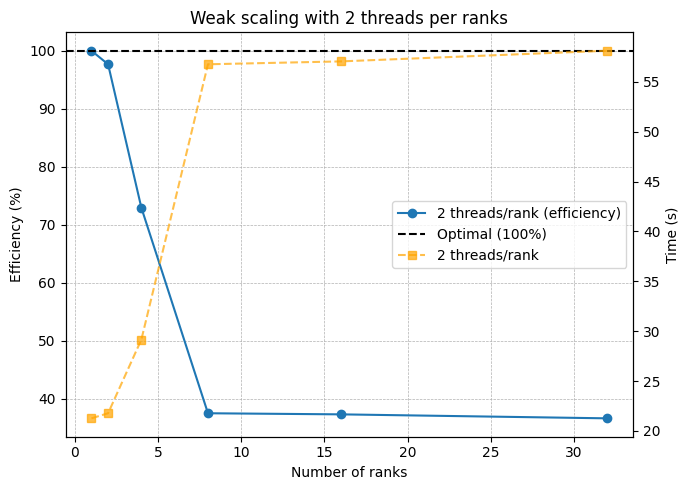

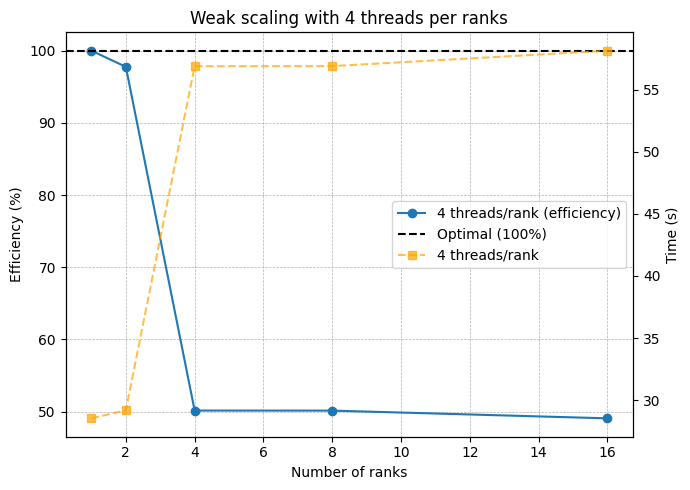

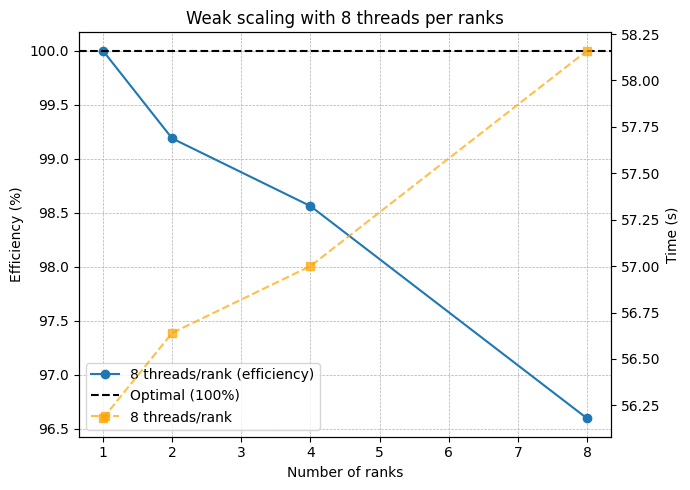

In [3]:
import matplotlib.pyplot as plt

# Données : weak scaling avec 2 threads par rank
ranks_2t = [1, 2, 4, 8, 16, 32]
time_2t = [21.26, 21.77, 29.16, 56.75, 57.04, 58.11]

# Données : weak scaling avec 4 threads par rank
ranks_4t = [1, 2, 4, 8, 16]
time_4t = [28.53, 29.18, 56.89, 56.90, 58.14]

# Données : weak scaling avec 8 threads par rank
ranks_8t = [1, 2, 4, 8]
time_8t = [56.18, 56.64, 57.00, 58.16]

# Fonction pour tracer l'efficacité en % et le temps (weak scaling)
def plot_weak_scaling(ranks, times, n_threads):
    t1 = times[0]
    efficiency = [100 * t1 / t for t in times]

    fig, ax1 = plt.subplots(figsize=(7,5))

    # Efficacité (%) axe gauche
    ax1.plot(ranks, efficiency, 'o-', label=f"{n_threads} threads/rank (efficiency)")
    ax1.axhline(100, color='k', linestyle='--', label="Optimal (100%)")
    ax1.set_xlabel("Number of ranks")
    ax1.set_ylabel("Efficiency (%)")

    # Temps (s) axe droit
    ax2 = ax1.twinx()
    ax2.plot(ranks, times, 's--', color='orange', alpha=0.7, label=f"{n_threads} threads/rank ")
    ax2.set_ylabel("Time (s)")

    # Légende combinée
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc="best")

    ax1.grid(True, which="both", ls="--", lw=0.5)
    plt.title(f"Weak scaling with {n_threads} threads per ranks")
    plt.tight_layout()
    plt.show()

# Tracés
plot_weak_scaling(ranks_2t, time_2t, 2)
plot_weak_scaling(ranks_4t, time_4t, 4)
plot_weak_scaling(ranks_8t, time_8t, 8)

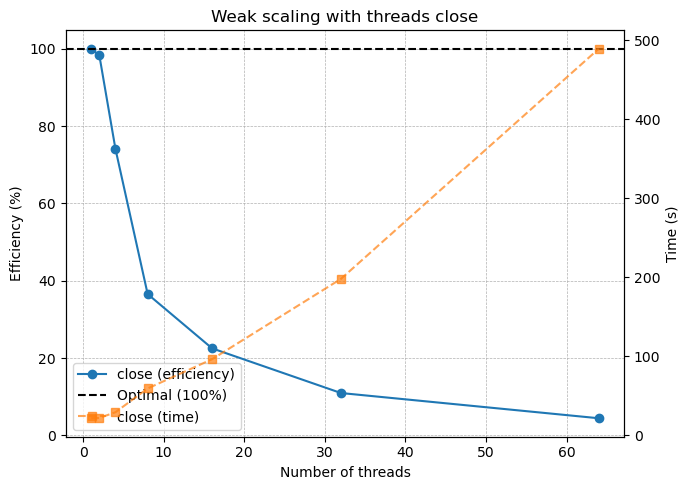

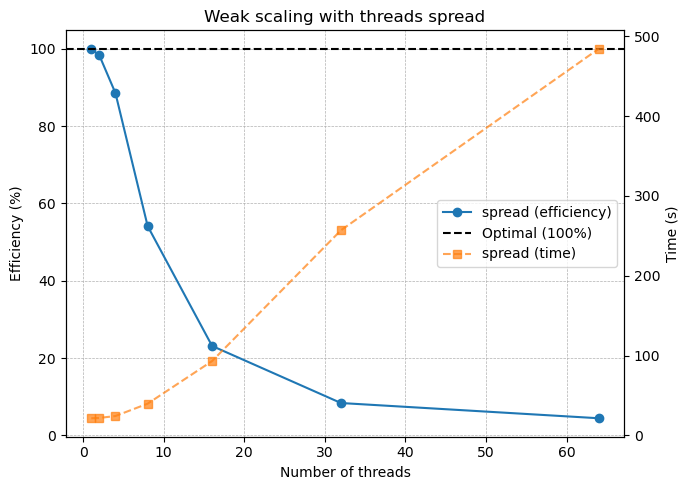

In [2]:
import matplotlib.pyplot as plt

# Données : weak scaling avec processes close
ranks_close = [1, 2, 4, 8, 16, 32, 64]
time_close = [21.7,22.07,29.28,59.36,96.37,197.95,488.88]
#fais pour 1,2,4,8,64
# Données : weak scaling avec processes spread
ranks_spread = [1, 2, 4, 8, 16, 32, 64]
time_spread = [21.57, 21.94, 24.36, 39.84,93.18,257.01,484.24 ]

# Fonction pour tracer l'efficacité en % et le temps (weak scaling)
def plot_weak_scaling(ranks, times, label):
    t1 = times[0]
    efficiency = [100 * t1 / t for t in times]

    fig, ax1 = plt.subplots(figsize=(7,5))

    # Efficacité (%) axe gauche
    ax1.plot(ranks, efficiency, 'o-', label=f"{label} (efficiency)")
    ax1.axhline(100, color='k', linestyle='--', label="Optimal (100%)")
    ax1.set_xlabel("Number of threads")
    ax1.set_ylabel("Efficiency (%)")

    # Temps (s) axe droit
    ax2 = ax1.twinx()
    ax2.plot(ranks, times, 's--', color='tab:orange', alpha=0.7, label=f"{label} (time)")
    ax2.set_ylabel("Time (s)")

    # Légende combinée
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc="best")

    ax1.grid(True, which="both", ls="--", lw=0.5)
    plt.title(f"Weak scaling with threads {label}")
    plt.tight_layout()
    plt.show()

# Tracés
plot_weak_scaling(ranks_close, time_close, "close")
plot_weak_scaling(ranks_spread, time_spread, "spread")
